In [1]:
from Solver import *
import numpy as np

# Prvi zadatak
---
Ponašanje sustava za:
- Eulerov postupak
- Obrnuti Eulerov postupak
- Trapez postupak
- Runge-Kutt postupak
- PC postupak

Korišteni parametri:
- $T = 0.01$
- $t_{max} = 10$
- $A = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}, x_{0} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$
- stvarna vrijednost varijabli $x_1$ i $x_2$: $x_{1_{gt}}(t) = \cos(t) + \sin(t), x_{2_{gt}}(t) = \cos(t) - \sin(t)$

In [2]:
t = np.linspace(0, 10, 1001)
x1 = np.cos(t) + np.sin(t)
x2 = np.cos(t) - np.sin(t)
gt_list = []

for x1_i, x2_i in zip(x1, x2):
    gt_list.append(Matrix().set_values([[x1_i], [x2_i]]))

In [3]:
euler = Euler('a', 'b', 10, 0.01, 'r')
euler.solve('x')
euler_error = euler.calculate_error(gt_list)

reversed_euler = ReversedEuler('a', 'b', 10, 0.01, 'r')
reversed_euler.solve('x')
reversed_euler_error = reversed_euler.calculate_error(gt_list)

trapese = Trapez('a', 'b', 10, 0.01, 'r')
trapese.solve('x')
trapese_error = trapese.calculate_error(gt_list)

rn = RungeKutta('a', 'b', 10, 0.01, 'r')
rn.solve('x')
rn_error = rn.calculate_error(gt_list)

pece2 = PredictCorrect('a', 'b', 10, 0.01, 'r', corrector_iters=2, predictor="Euler", corrector="InverseEuler" )
pece2.solve('x')
pece2_error = pece2.calculate_error(gt_list)

pece = PredictCorrect('a', 'b', 10, 0.01, 'r', corrector_iters=1, predictor="Euler", corrector="Trapez" )
pece.solve('x')
pece_error = pece.calculate_error(gt_list)

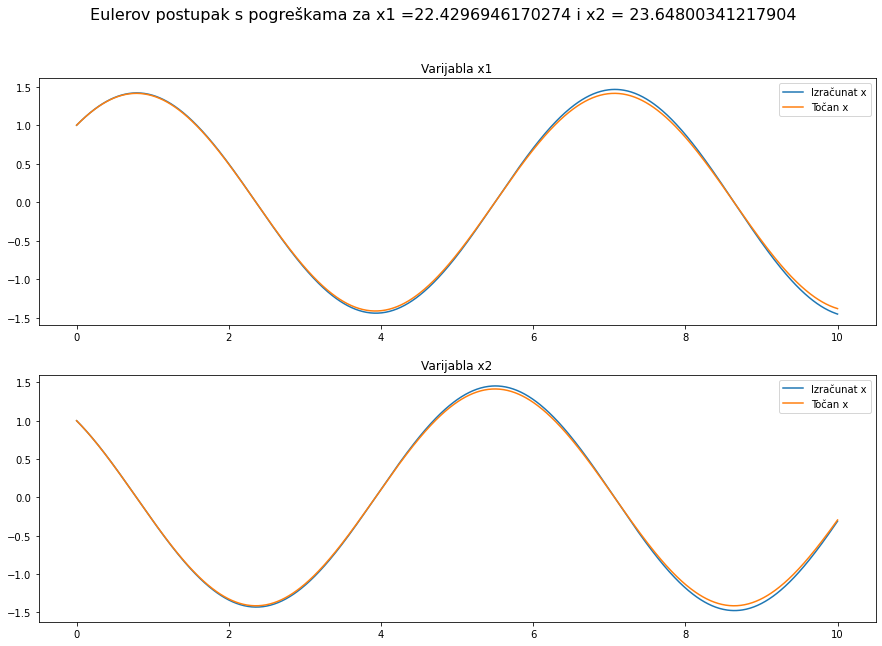

In [4]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Eulerov postupak s pogreškama za x1 ={} i x2 = {}".format(euler_error[0, 0], euler_error[1, 0]), fontsize=16)
for i in (0, 1):
    plt.subplot(2, 1, i+1)
    tmp_step = []
    for step in euler.steps:
        tmp_step.append(step[i, 0])
    plt.plot(t, tmp_step, label="Izračunat x")
    if i == 0:
        plt.plot(t, x1, label="Točan x")
    else:
        plt.plot(t, x2, label="Točan x")
    plt.legend()
    plt.title("Varijabla x{}".format(i+1));

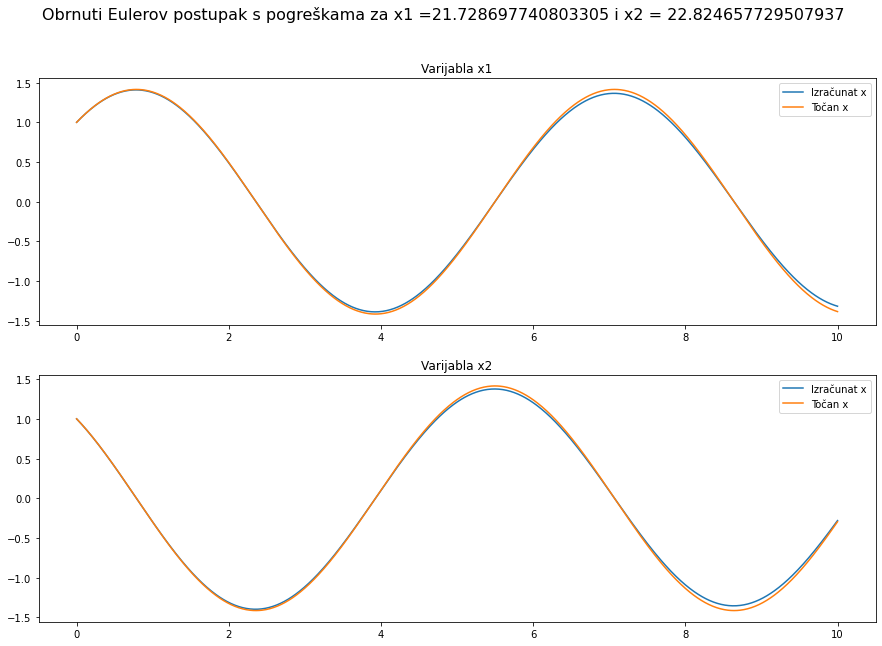

In [5]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Obrnuti Eulerov postupak s pogreškama za x1 ={} i x2 = {}".format(
    reversed_euler_error[0, 0], reversed_euler_error[1, 0]), fontsize=16)
for i in (0, 1):
    plt.subplot(2, 1, i+1)
    tmp_step = []
    for step in reversed_euler.steps:
        tmp_step.append(step[i, 0])
    plt.plot(t, tmp_step, label="Izračunat x")
    if i == 0:
        plt.plot(t, x1, label="Točan x")
    else:
        plt.plot(t, x2, label="Točan x")
    plt.legend()
    plt.title("Varijabla x{}".format(i+1));

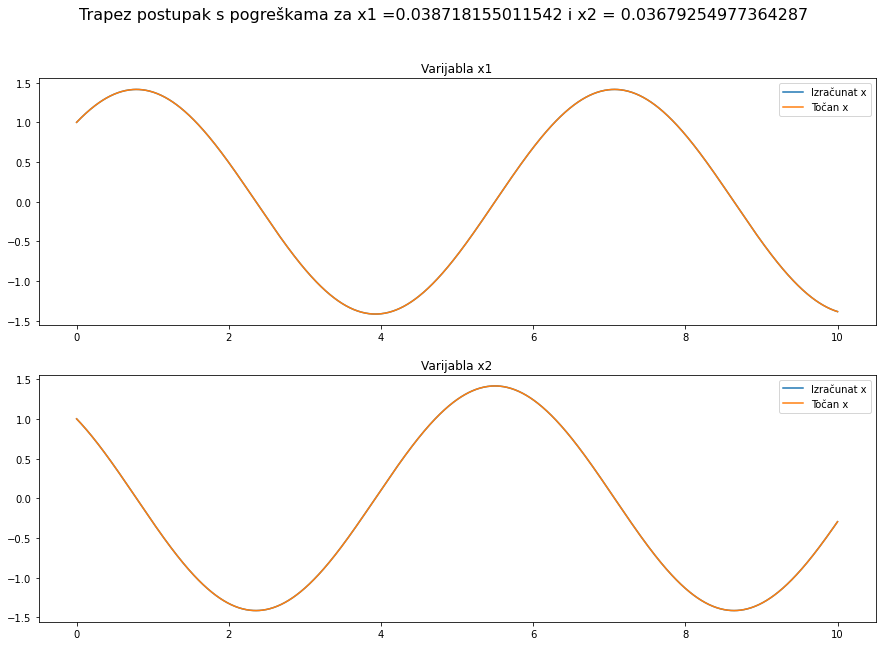

In [6]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Trapez postupak s pogreškama za x1 ={} i x2 = {}".format(
    trapese_error[0, 0], trapese_error[1, 0]), fontsize=16)
for i in (0, 1):
    plt.subplot(2, 1, i+1)
    tmp_step = []
    for step in trapese.steps:
        tmp_step.append(step[i, 0])
    plt.plot(t, tmp_step, label="Izračunat x")
    if i == 0:
        plt.plot(t, x1, label="Točan x")
    else:
        plt.plot(t, x2, label="Točan x")
    plt.legend()
    plt.title("Varijabla x{}".format(i+1));

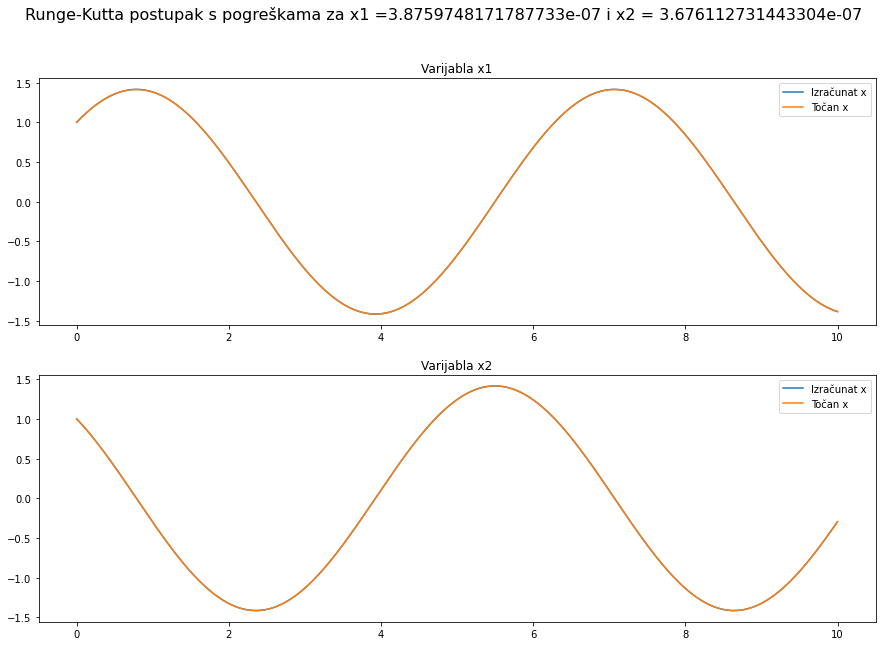

In [7]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Runge-Kutta postupak s pogreškama za x1 ={} i x2 = {}".format(
    rn_error[0, 0], rn_error[1, 0]), fontsize=16)
for i in (0, 1):
    plt.subplot(2, 1, i+1)
    tmp_step = []
    for step in rn.steps:
        tmp_step.append(step[i, 0])
    plt.plot(t, tmp_step, label="Izračunat x")
    if i == 0:
        plt.plot(t, x1, label="Točan x")
    else:
        plt.plot(t, x2, label="Točan x")
    plt.legend()
    plt.title("Varijabla x{}".format(i+1));

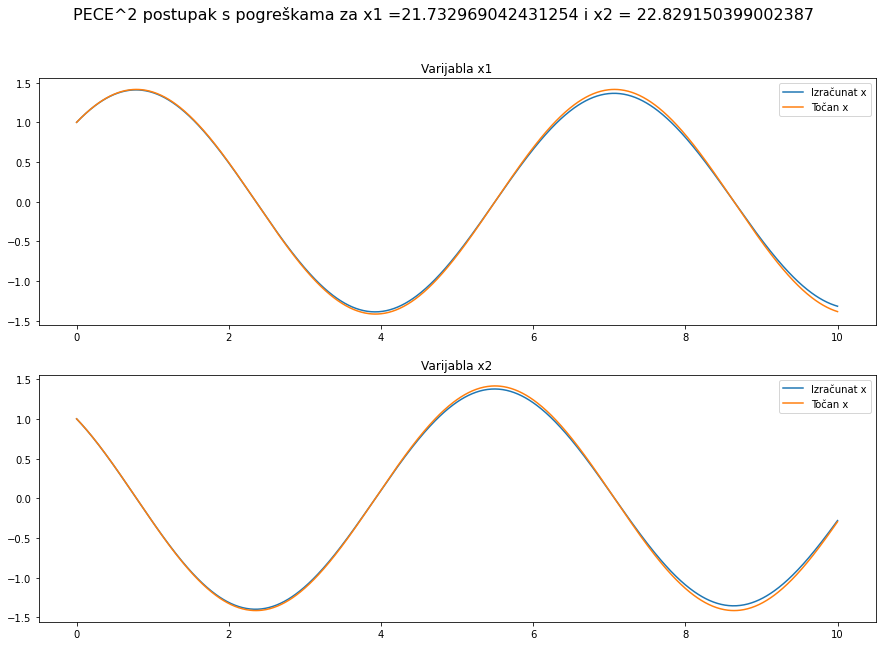

In [8]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle("PECE^2 postupak s pogreškama za x1 ={} i x2 = {}".format(
    pece2_error[0, 0], pece2_error[1, 0]), fontsize=16)
for i in (0, 1):
    plt.subplot(2, 1, i+1)
    tmp_step = []
    for step in pece2.steps:
        tmp_step.append(step[i, 0])
    plt.plot(t, tmp_step, label="Izračunat x")
    if i == 0:
        plt.plot(t, x1, label="Točan x")
    else:
        plt.plot(t, x2, label="Točan x")
    plt.legend()
    plt.title("Varijabla x{}".format(i+1));

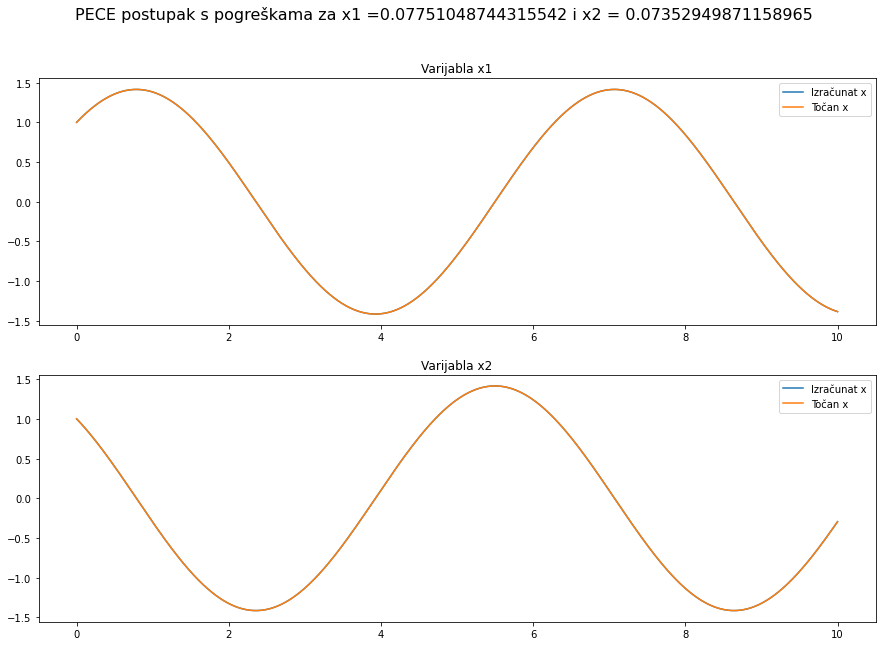

In [9]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle("PECE postupak s pogreškama za x1 ={} i x2 = {}".format(
    pece_error[0, 0], pece_error[1, 0]), fontsize=16)
for i in (0, 1):
    plt.subplot(2, 1, i+1)
    tmp_step = []
    for step in pece.steps:
        tmp_step.append(step[i, 0])
    plt.plot(t, tmp_step, label="Izračunat x")
    if i == 0:
        plt.plot(t, x1, label="Točan x")
    else:
        plt.plot(t, x2, label="Točan x")
    plt.legend()
    plt.title("Varijabla x{}".format(i+1));

# Drugi zadatak
---
Ponašanje sustava za:
- Eulerov postupak
- Obrnuti Eulerov postupak
- Trapez postupak
- Runge-Kutt postupak
- PC postupak

Korišteni parametri:
- $T = 0.1$
- $t_{max} = 1$
- $A = \begin{bmatrix} 0 & 1 \\ -200 & -102 \end{bmatrix}, x_{0} = \begin{bmatrix} 1 \\ -2 \end{bmatrix}$

In [10]:
euler = Euler('a2', 'b', 1, 0.1, 'r')
euler.solve('x2')

reversed_euler = ReversedEuler('a2', 'b', 1, 0.1, 'r')
reversed_euler.solve('x2')

trapese = Trapez('a2', 'b', 1, 0.1, 'r')
trapese.solve('x2')

rn = RungeKutta('a2', 'b', 1, 0.1, 'r')
rn.solve('x2')

pece2 = PredictCorrect('a2', 'b', 1, 0.1, 'r', corrector_iters=2, predictor="Euler", corrector="InverseEuler" )
pece2.solve('x2')

pece = PredictCorrect('a2', 'b', 1, 0.1, 'r', corrector_iters=1, predictor="Euler", corrector="Trapez" )
pece.solve('x2')

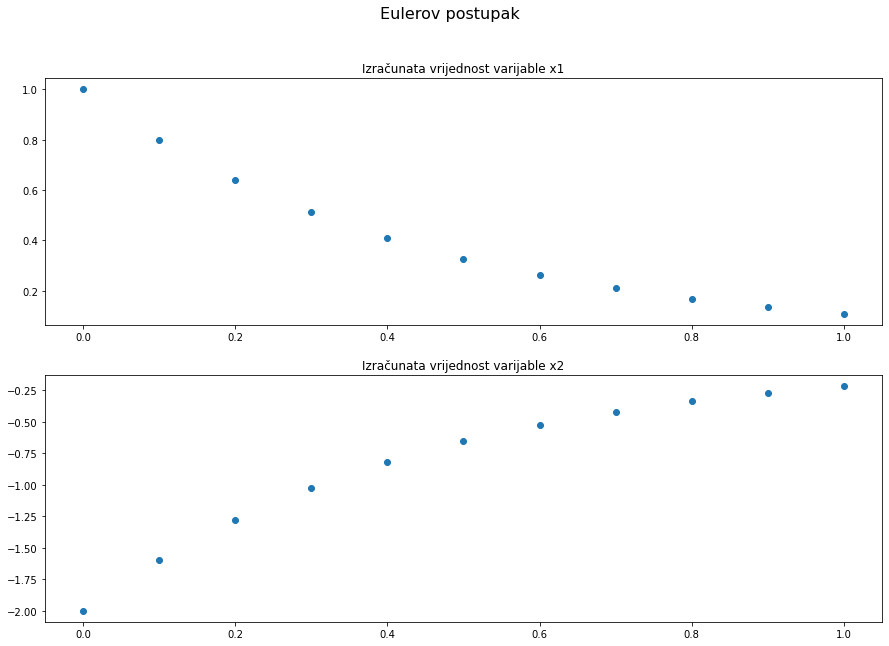

In [11]:
euler.plot_steps("Eulerov postupak")

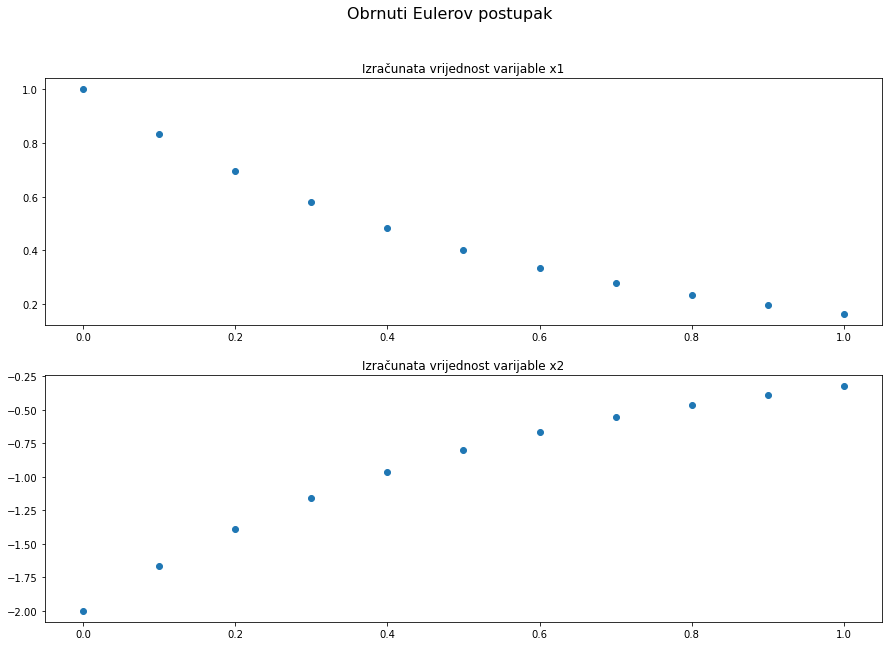

In [12]:
reversed_euler.plot_steps("Obrnuti Eulerov postupak")

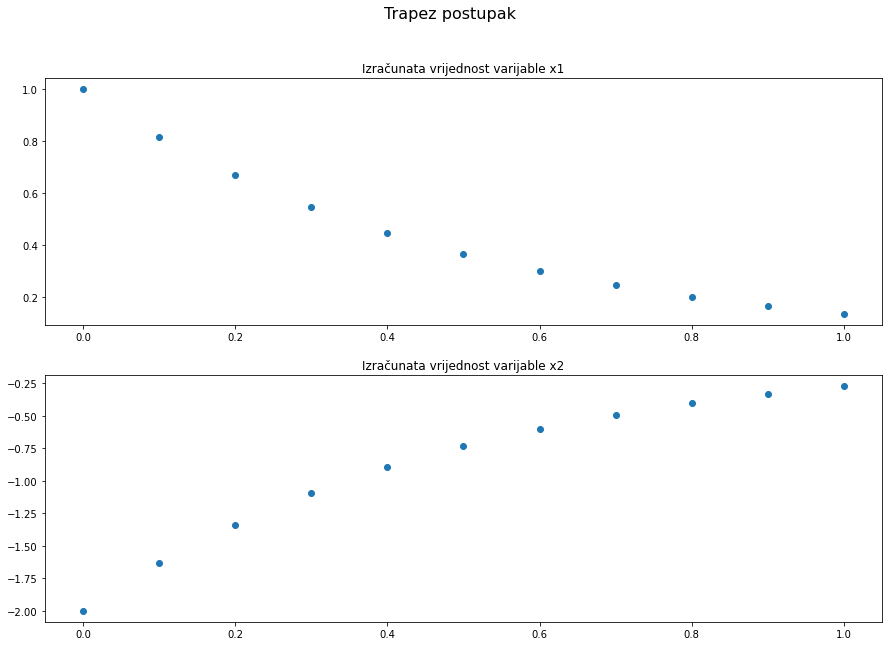

In [13]:
trapese.plot_steps("Trapez postupak")

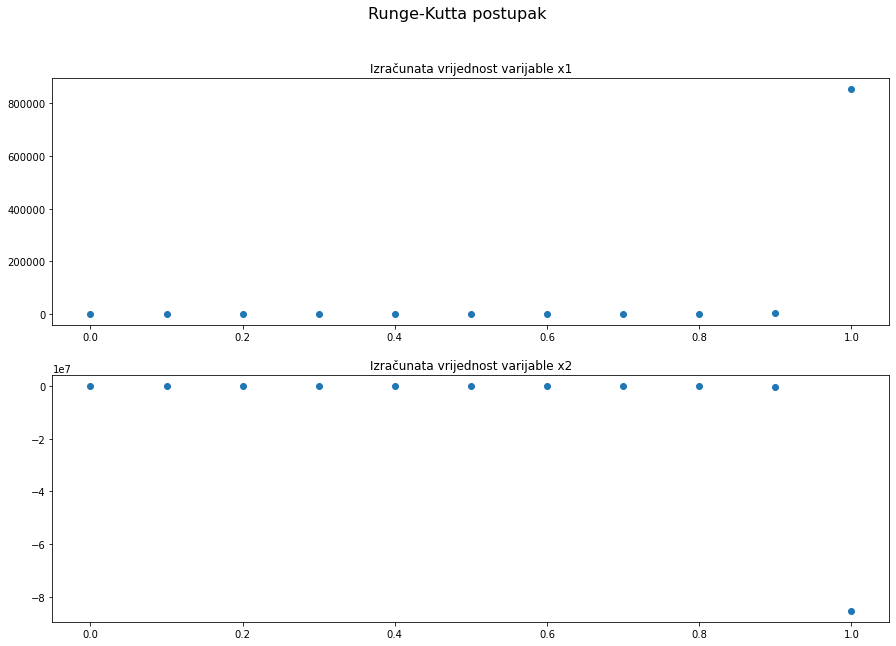

In [14]:
rn.plot_steps("Runge-Kutta postupak")

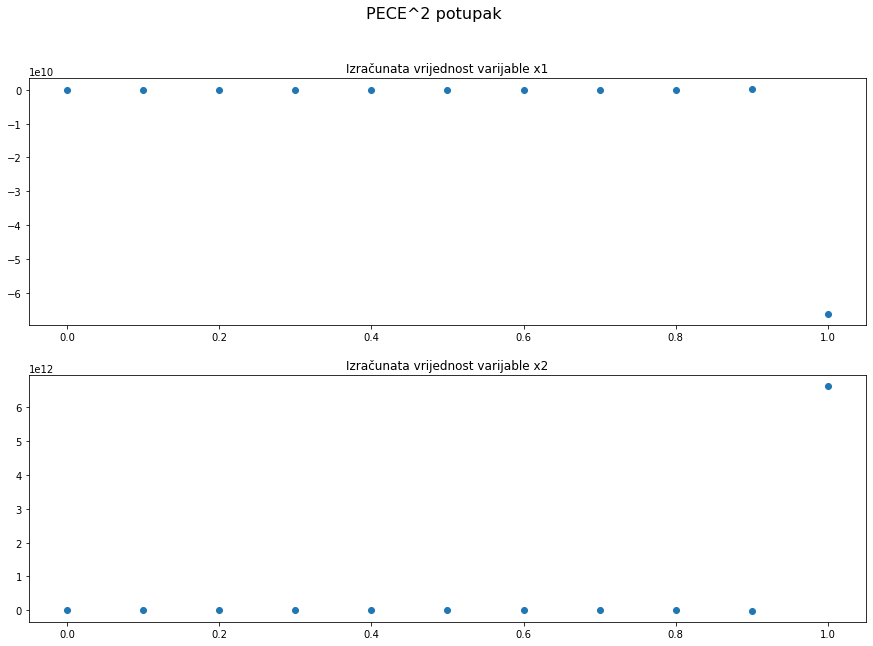

In [15]:
pece2.plot_steps("PECE^2 potupak")

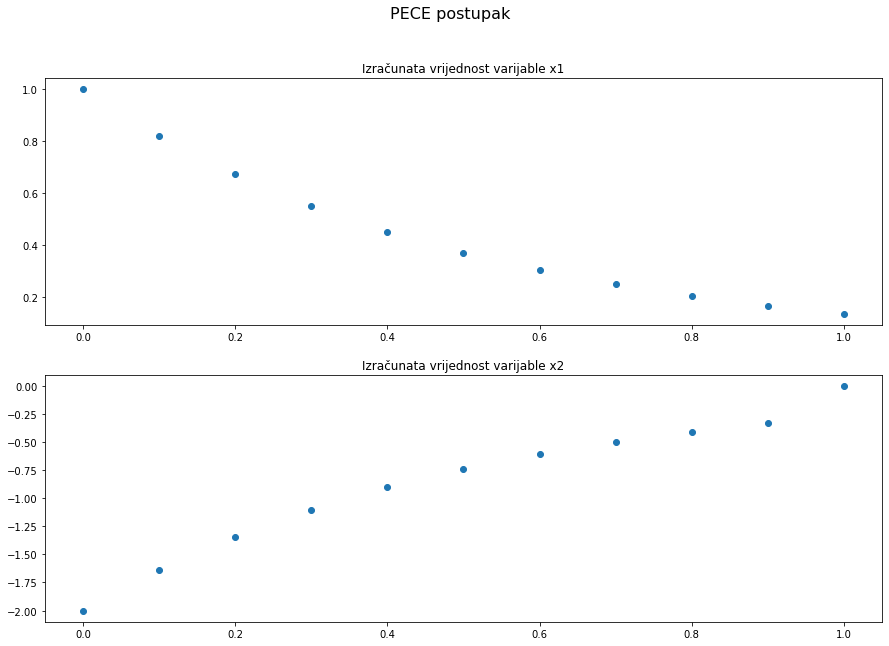

In [16]:
pece.plot_steps("PECE postupak")

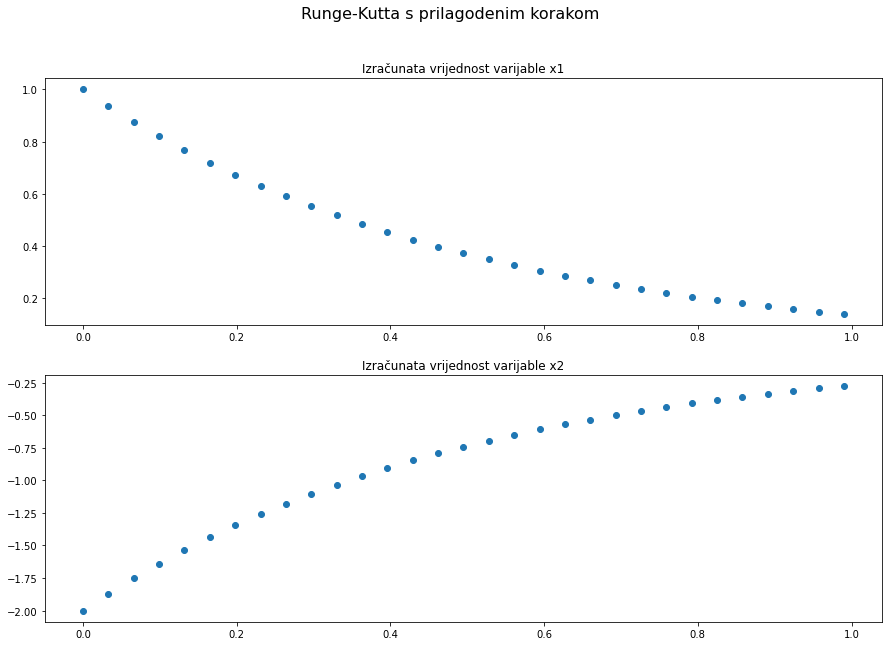

In [17]:
rn = RungeKutta('a2', 'b', 1, 0.033, 'r')
rn.solve('x2')
rn.plot_steps("Runge-Kutta s prilagodenim korakom")

# Treći zadatak
---
Ponašanje sustava za:
- Eulerov postupak
- Obrnuti Eulerov postupak
- Trapez postupak
- Runge-Kutt postupak
- PC postupak

Korišteni parametri:
- $T = 0.01$
- $t_{max} = 10$
- $A = \begin{bmatrix} 0 & -2 \\ 1 & -3 \end{bmatrix}, B = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix}, r = \begin{bmatrix} 1 \\ 1 \end{bmatrix}, x_0 = \begin{bmatrix} 1 \\ 3 \end{bmatrix}$

In [18]:
euler = Euler('a3', 'b3', 10, 0.01, 'r3')
euler.solve('x3')

reversed_euler = ReversedEuler('a3', 'b3', 10, 0.01, 'r3')
reversed_euler.solve('x3')

trapese = Trapez('a3', 'b3', 10, 0.01, 'r3')
trapese.solve('x3')

rn = RungeKutta('a3', 'b3', 10, 0.01, 'r3')
rn.solve('x3')

pece2 = PredictCorrect('a3', 'b3', 10, 0.01, 'r3', corrector_iters=2, predictor="Euler", corrector="InverseEuler" )
pece2.solve('x3')

pece = PredictCorrect('a3', 'b3', 10, 0.01, 'r3', corrector_iters=1, predictor="Euler", corrector="Trapez" )
pece.solve('x3')

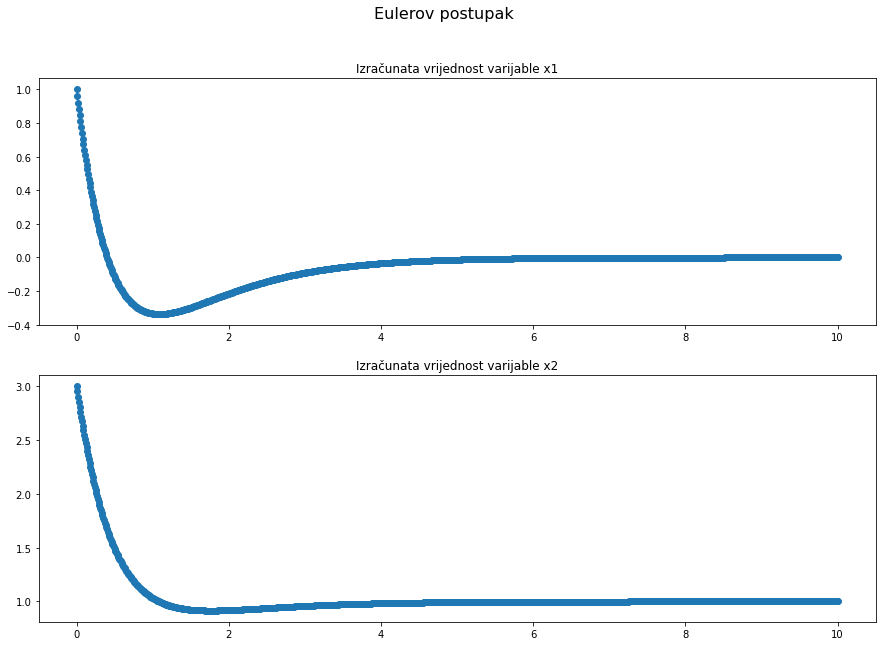

In [19]:
euler.plot_steps("Eulerov postupak")

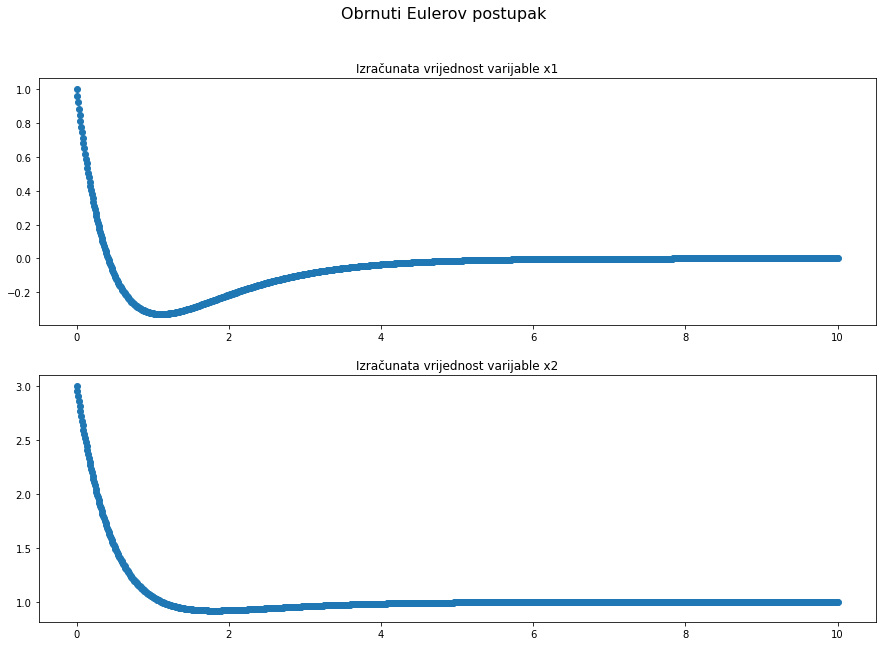

In [20]:
reversed_euler.plot_steps("Obrnuti Eulerov postupak")

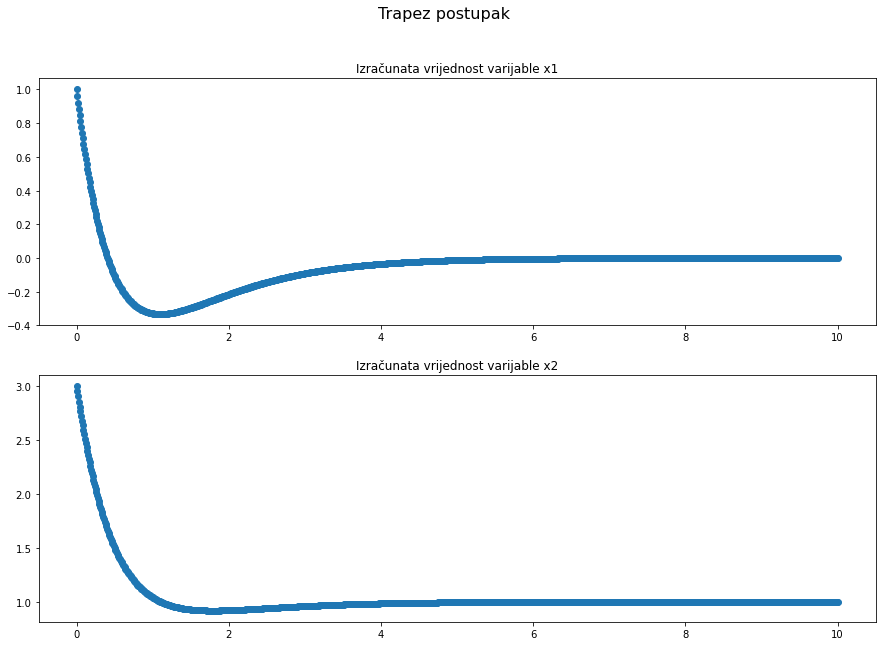

In [21]:
trapese.plot_steps("Trapez postupak")

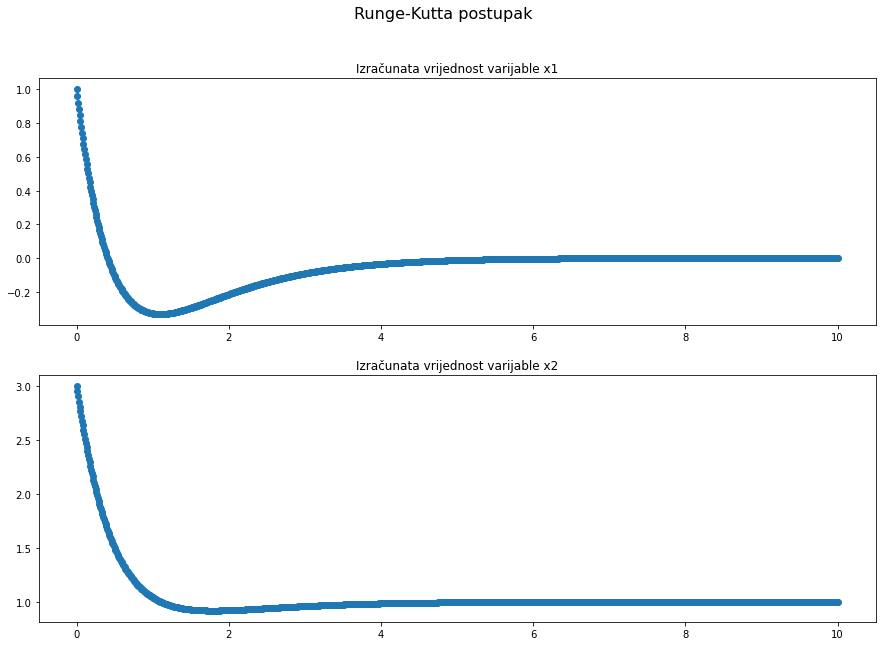

In [22]:
rn.plot_steps("Runge-Kutta postupak")

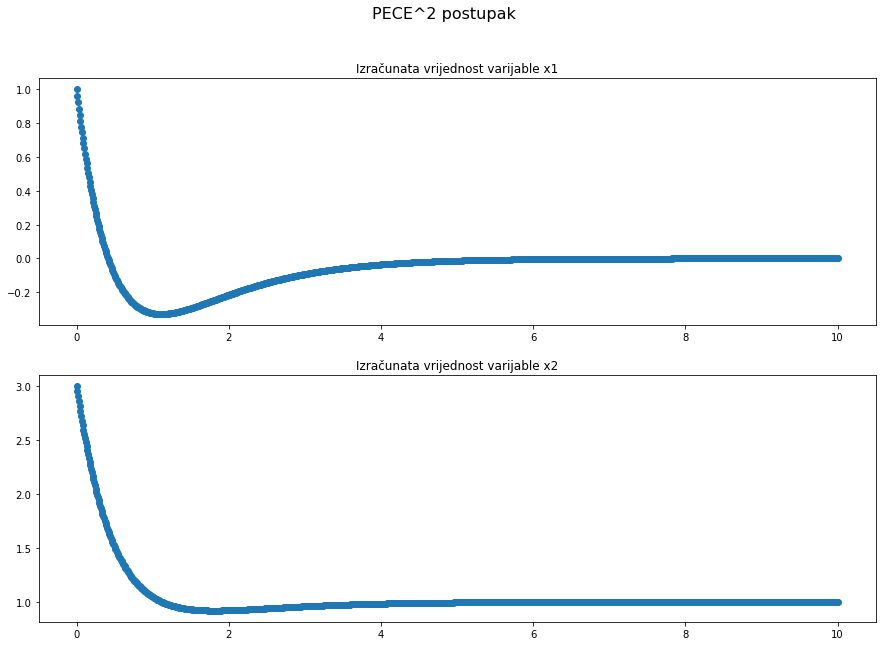

In [23]:
pece2.plot_steps("PECE^2 postupak")

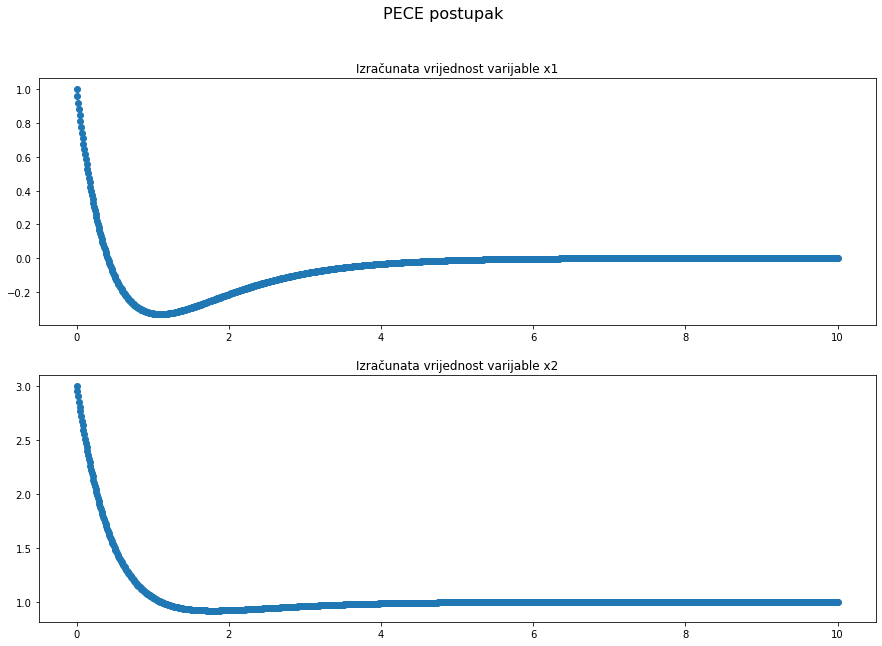

In [24]:
pece.plot_steps("PECE postupak")

# Četvrti zadatak
---
Ponašanje sustava za:
- Eulerov postupak
- Obrnuti Eulerov postupak
- Trapez postupak
- Runge-Kutt postupak
- PC postupak

Korišteni parametri:
- $T = 0.01$
- $t_{max} = 10$
- $A = \begin{bmatrix} 1 & -5 \\ 1 & -7 \end{bmatrix}, B = \begin{bmatrix} 5 & 0 \\ 0 & 3 \end{bmatrix}, r = \begin{bmatrix} t \\ t \end{bmatrix}, x_0 = \begin{bmatrix} -1 \\ 3 \end{bmatrix}$

In [25]:
euler = Euler('a4', 'b4', 1, 0.01, 'r4')
euler.solve('x4')

reversed_euler = ReversedEuler('a4', 'b4', 1, 0.01, 'r4')
reversed_euler.solve('x4')

trapese = Trapez('a4', 'b4', 1, 0.01, 'r4')
trapese.solve('x4')

rn = RungeKutta('a4', 'b4', 1, 0.01, 'r4')
rn.solve('x4')

pece2 = PredictCorrect('a4', 'b4', 1, 0.01, 'r4', corrector_iters=2, predictor="Euler", corrector="InverseEuler" )
pece2.solve('x4')

pece = PredictCorrect('a4', 'b4', 1, 0.01, 'r4', corrector_iters=1, predictor="Euler", corrector="Trapez" )
pece.solve('x4')

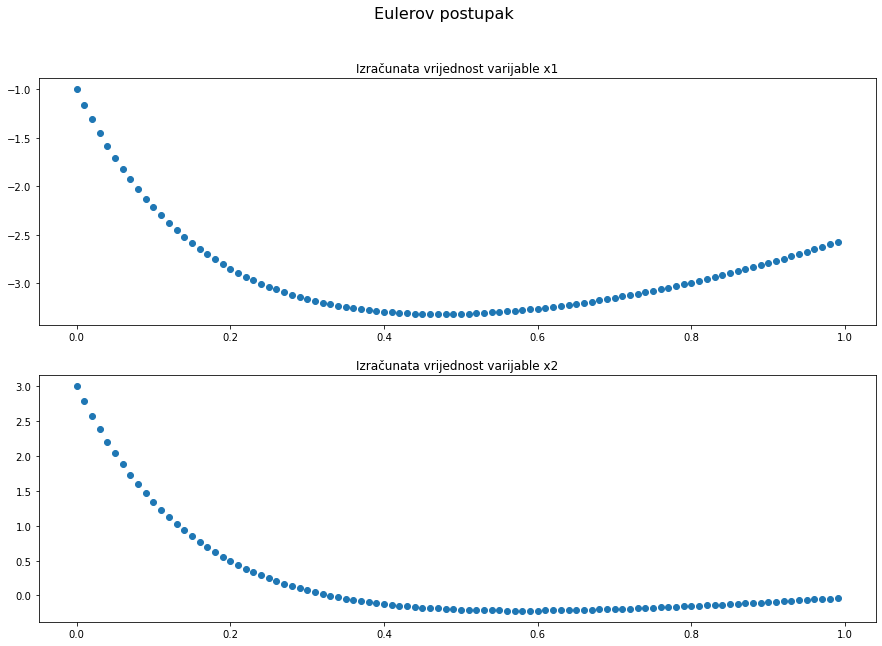

In [26]:
euler.plot_steps("Eulerov postupak")

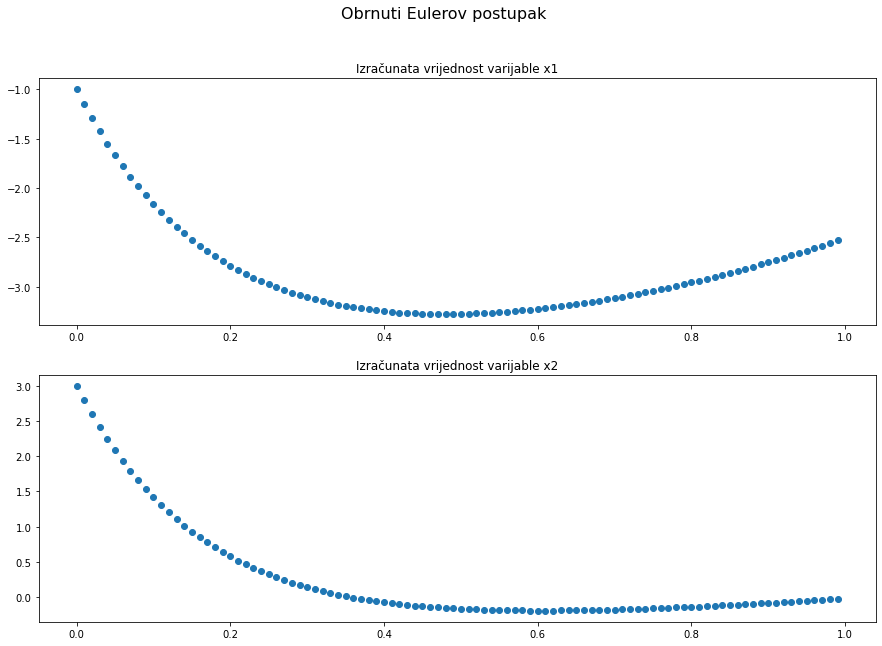

In [27]:
reversed_euler.plot_steps("Obrnuti Eulerov postupak")

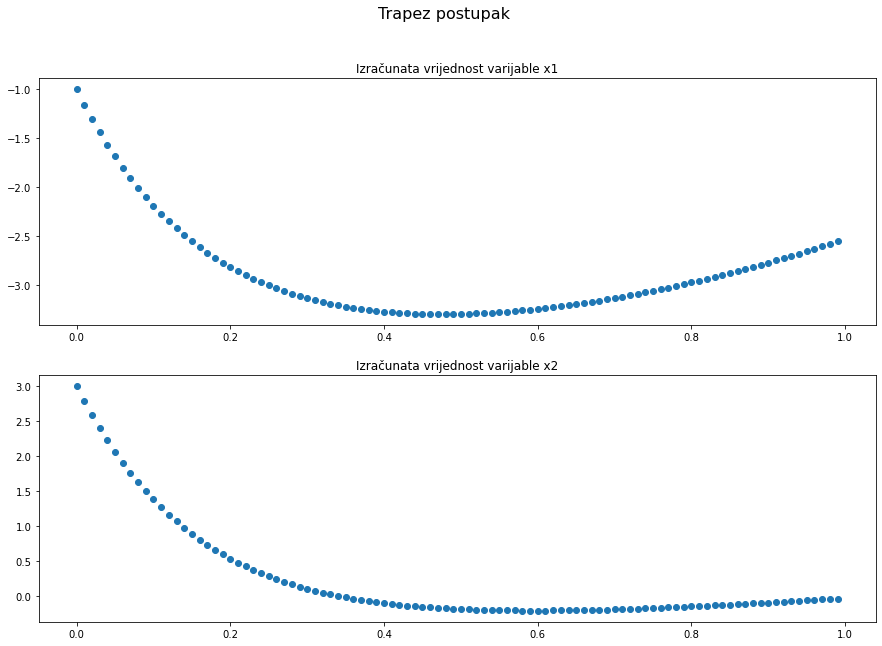

In [28]:
trapese.plot_steps("Trapez postupak")

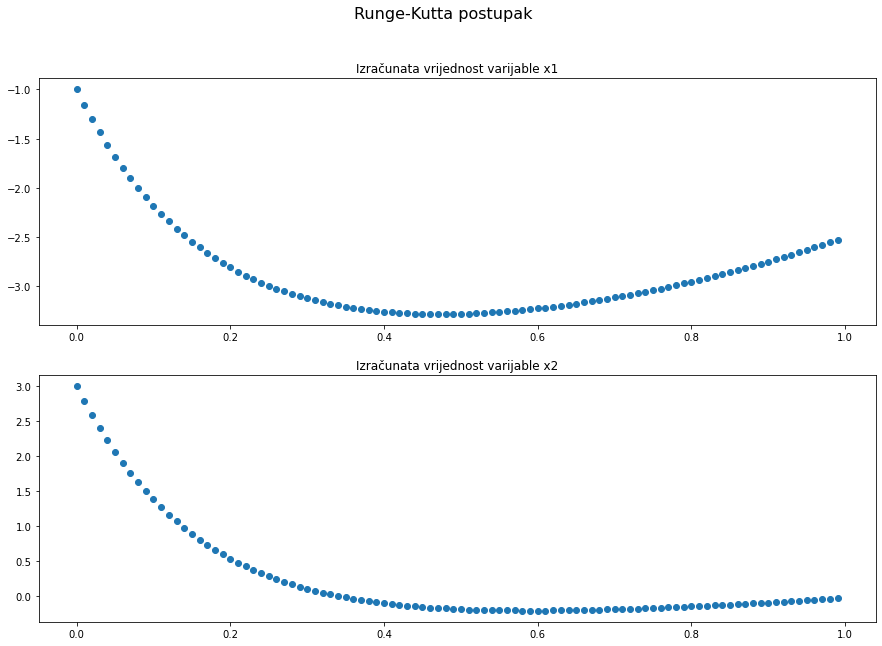

In [29]:
rn.plot_steps("Runge-Kutta postupak")

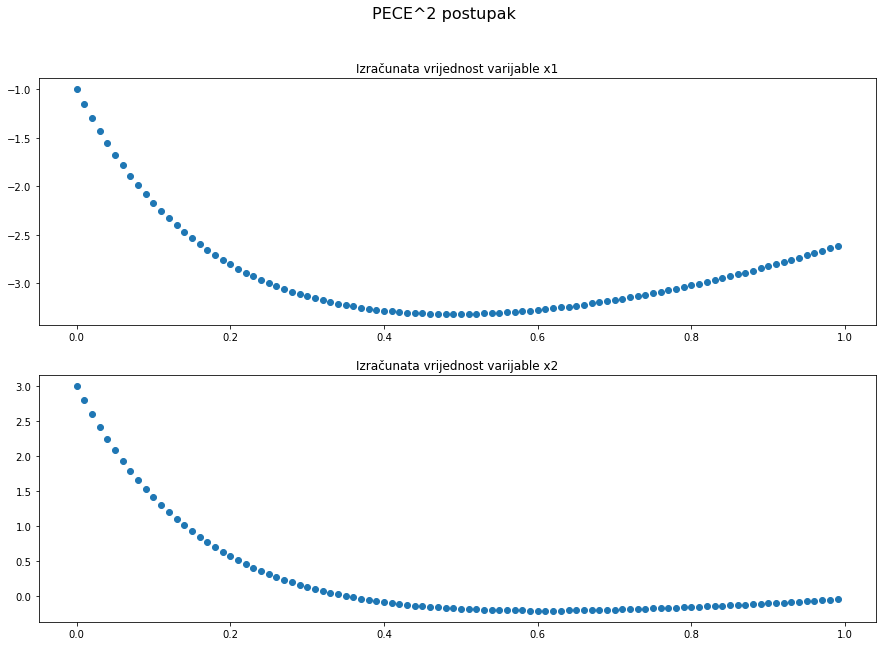

In [30]:
pece2.plot_steps("PECE^2 postupak")

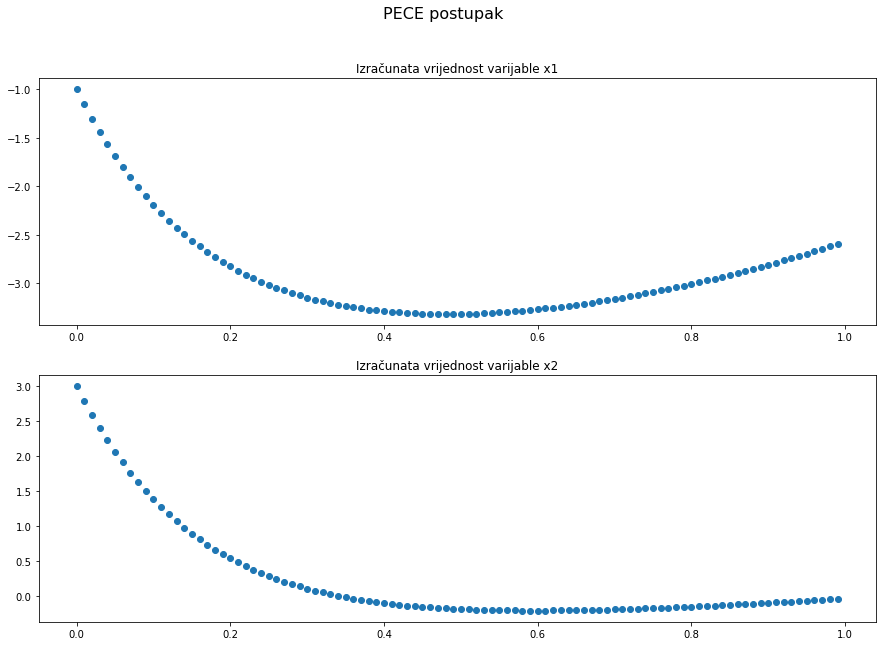

In [31]:
pece.plot_steps("PECE postupak")